# Data Science and Business Analytics (GRIP June 2021)

## Task 1 : Prediction Using Supervised ML

## Submitted By: Nikita Gulati

## Problem Statement : Predict the percentage of an student based on the no. of study hours. It is a simple linear regression task as it involves  2 variables.

In [5]:
import numpy as np
import pandas as pd

# for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning algorithms
import sklearn 

import warnings
warnings.filterwarnings(action='ignore')

## Reading the DataSet

In [7]:
#Loading the data
dataset = pd.read_csv('student_scores - student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Description

In [8]:
dataset.shape

(25, 2)

In [9]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Pre-Processing

In [13]:
# Duplicated data
dataset[dataset.duplicated() == True]

,Hours,Scores


In [15]:
import missingno as msn

In [16]:
# Checking missing values
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

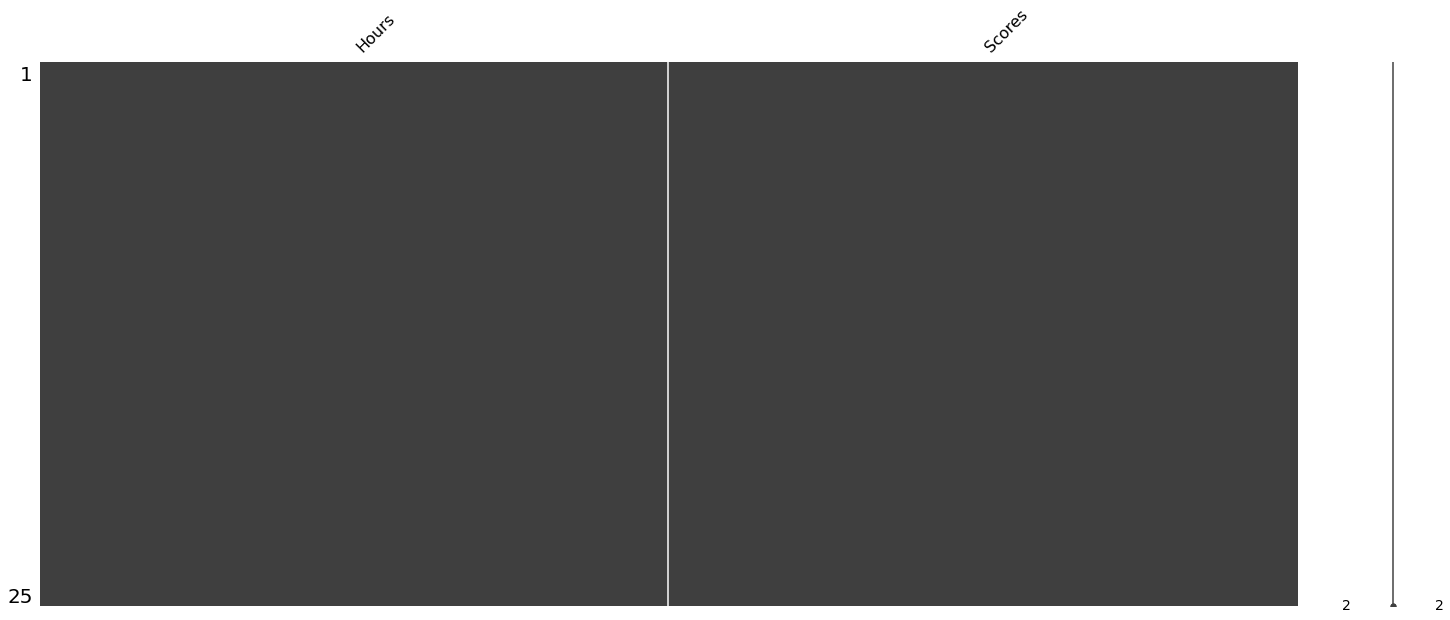

In [17]:
msn.matrix(dataset)

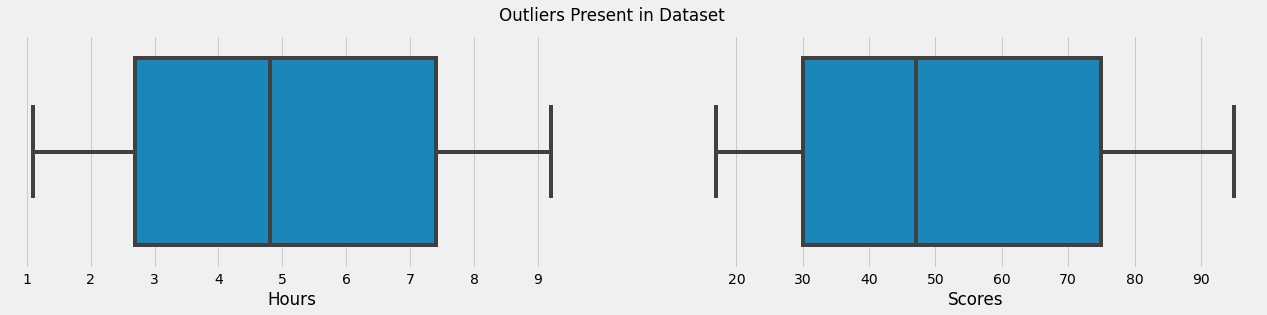

In [19]:
# Checking outliers using boxplot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20,4)

plt.subplot(1,2,1)
sns.boxplot(x=dataset['Hours'])

plt.subplot(1,2,2)
sns.boxplot(x=dataset['Scores'])

plt.suptitle('Outliers Present in Dataset')
plt.show()

## Exploratory Data Analysis

### Univariate Analysis

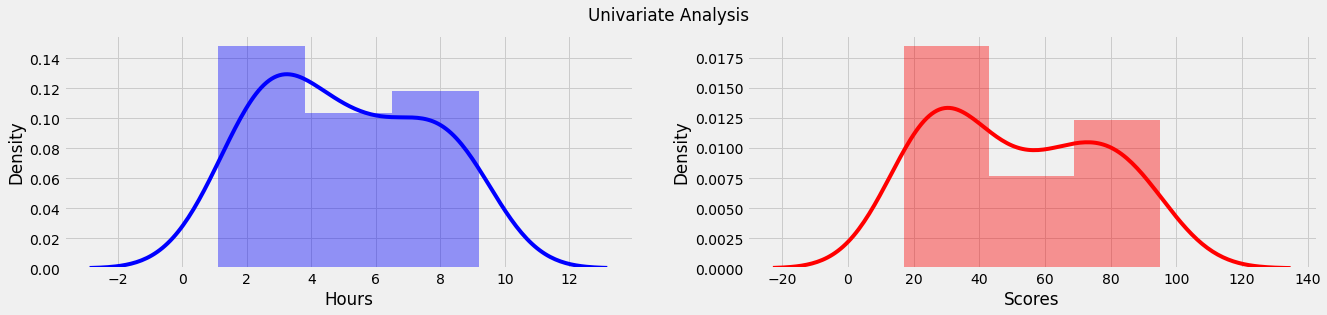

In [20]:
#Univariate Analysis

plt.rcParams['figure.figsize'] = (20,4)

plt.subplot(1,2,1)
sns.distplot(dataset['Hours'], color = "blue")

plt.subplot(1,2,2)
sns.distplot(dataset['Scores'], color = "red")

plt.suptitle('Univariate Analysis')
plt.show()

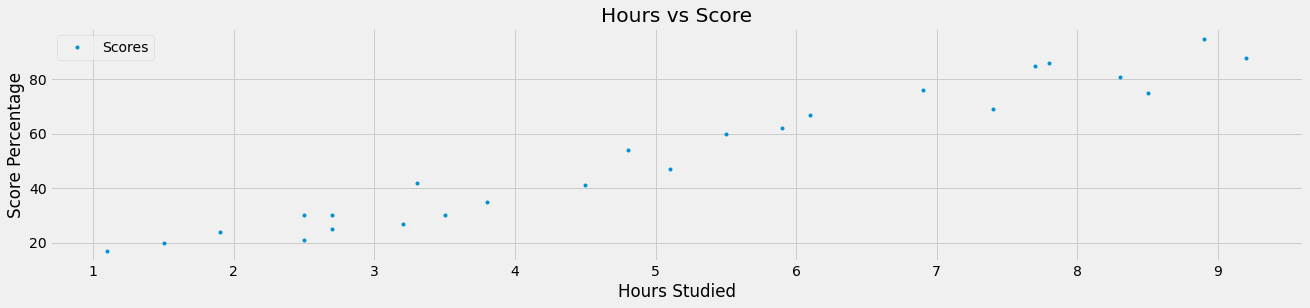

In [24]:
dataset.plot(x="Hours", y="Scores", style=".")
plt.title("Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score Percentage")
plt.show()

## Machine Learning Modelling - Linear Regression

In [29]:
#Splitting the model
x = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [27]:
from sklearn import linear_model
regression = linear_model.LinearRegression()

In [30]:
regression.fit(x_train, y_train)

LinearRegression()

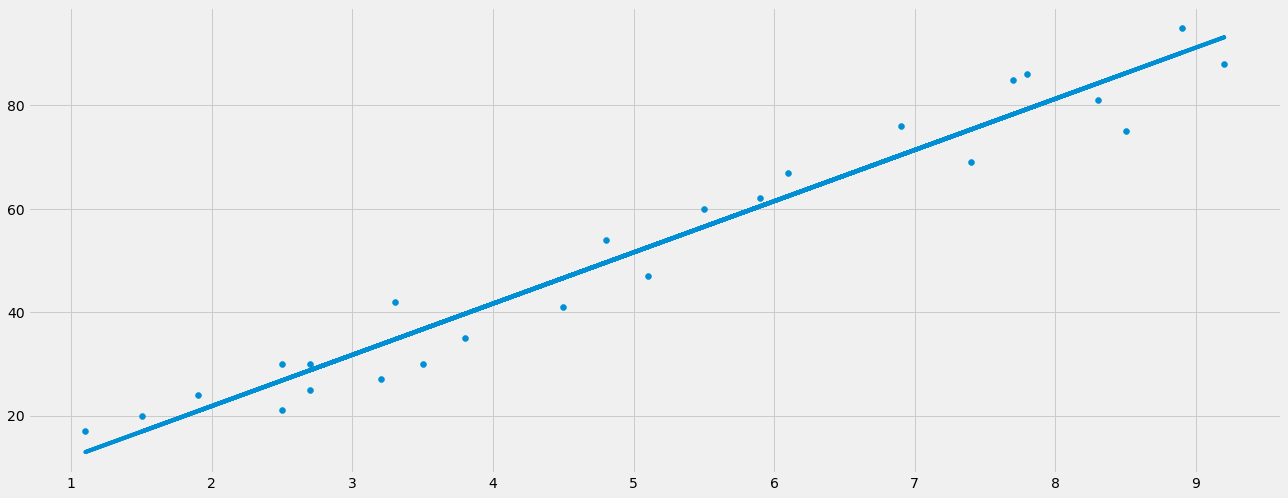

In [31]:
#Plotting the regression line
plt.figure(figsize=(20,8))
regression_line = regression.coef_ * X + regression.intercept_

#Scatter Plot the test data
plt.scatter(X, y)
plt.plot(X, regression_line)
plt.show()

In [32]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [33]:
#Predicting the model
y_pred = regression.predict(X_test)
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [34]:
df = pd.DataFrame({'Test': y_test, 'Predict': y_pred})
print(df)

   Test    Predict
0    20  16.884145
1    27  33.732261
2    69  75.357018
3    30  26.794801
4    62  60.491033


In [35]:
#Predicting the test value for 9.25 hours
hours = [[9.25]]
pred = regression.predict(hours)
print("No. of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737535


## The predicted score for a student studying for 9.25 hours is approximately 93.692